## Importing libraries

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# cloning the github repo
! git clone https://github.com/BigfriendP/NASWOT
%cd NASWOT

Cloning into 'NASWOT'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 203 (delta 27), reused 97 (delta 27), pack-reused 105
Receiving objects: 100% (203/203), 7.45 MiB | 11.87 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/NASWOT


# Import 200 epochs test accuracy and score CSV files

(9 csv files: one for each combination (dataset, metric))

In [3]:
# importing cifar10 scores
cifar10_12ep_val = pd.read_csv('results/cifar10/val12/cifar10-val12.csv')
cifar10_relu_csv = pd.read_csv('results/cifar10/hook_logdet/cifar10-hook_logdet.csv')
cifar10_synflow_csv = pd.read_csv('results/cifar10/synflow/cifar10-synflow.csv')
cifar10_snip_csv = pd.read_csv('results/cifar10/snip/cifar10-snip.csv')
cifar10_combined_csv = pd.read_csv('results/cifar10/combined/cifar10-combined.csv')

# importing cifar100 scores
cifar100_12ep_val = pd.read_csv('results/cifar100/val12/cifar100-val12.csv')
cifar100_relu_csv = pd.read_csv('results/cifar100/hook_logdet/cifar100-hook_logdet.csv')
cifar100_synflow_csv = pd.read_csv('results/cifar100/synflow/cifar100-synflow.csv')
cifar100_snip_csv = pd.read_csv('results/cifar100/snip/cifar100-snip.csv')
cifar100_combined_csv = pd.read_csv('results/cifar100/combined/cifar100-combined.csv')

# importing imagenet scores
imagenet_12ep_val = pd.read_csv('results/ImageNet16-120/val12/ImageNet16-120-val12.csv')
imagenet_relu_csv = pd.read_csv('results/ImageNet16-120/hook_logdet/ImageNet16-120-hook_logdet.csv')
imagenet_synflow_csv = pd.read_csv('results/ImageNet16-120/synflow/ImageNet16-120-synflow.csv')
imagenet_snip_csv = pd.read_csv('results/ImageNet16-120/snip/ImageNet16-120-snip.csv')
imagenet_combined_csv = pd.read_csv('results/ImageNet16-120/combined/ImageNet16-120-combined.csv')

In [4]:
# importing accuracies full trained models
cifar10_test_acc = pd.read_csv('accuracy_full_trained_models/accuracy_cifar10.csv')
cifar100_test_acc = pd.read_csv('accuracy_full_trained_models/accuracy_cifar100.csv')
imagenet_test_acc = pd.read_csv('accuracy_full_trained_models/accuracy_ImageNet16-120.csv')

# Spearman correlation

## Calculating the spearman correlation among the metrics and the test accuracy

In [5]:
# spearman rank correlation for cifar10
sp_cifar10_12val = stats.spearmanr(cifar10_12ep_val['valid_accuracy_12_epochs'],cifar10_test_acc['accuracy']).correlation
sp_cifar10_relu = stats.spearmanr(cifar10_relu_csv['score'],cifar10_test_acc['accuracy']).correlation
sp_cifar10_synflow = stats.spearmanr(cifar10_synflow_csv['synflow'],cifar10_test_acc['accuracy']).correlation
sp_cifar10_snip = stats.spearmanr(cifar10_snip_csv['snip'],cifar10_test_acc['accuracy']).correlation
sp_cifar10_combined = stats.spearmanr(cifar10_combined_csv['combined_score'],cifar10_test_acc['accuracy']).correlation

# spearman rank correlation for cifar100
sp_cifar100_12val = stats.spearmanr(cifar100_12ep_val['valid_accuracy_12_epochs'],cifar100_test_acc['accuracy']).correlation
sp_cifar100_relu = stats.spearmanr(cifar100_relu_csv['score'],cifar100_test_acc['accuracy']).correlation
sp_cifar100_synflow = stats.spearmanr(cifar100_synflow_csv['synflow'],cifar100_test_acc['accuracy']).correlation
sp_cifar100_snip = stats.spearmanr(cifar100_snip_csv['snip'],cifar100_test_acc['accuracy']).correlation
sp_cifar100_combined = stats.spearmanr(cifar100_combined_csv['combined_score'],cifar100_test_acc['accuracy']).correlation

# spearman rank correlation for ImageNet
sp_imagenet_12val = stats.spearmanr(imagenet_12ep_val['valid_accuracy_12_epochs'],imagenet_test_acc['accuracy']).correlation
sp_imagenet_relu = stats.spearmanr(imagenet_relu_csv['score'],imagenet_test_acc['accuracy']).correlation
sp_imagenet_synflow = stats.spearmanr(imagenet_synflow_csv['synflow'],imagenet_test_acc['accuracy']).correlation
sp_imagenet_snip = stats.spearmanr(imagenet_snip_csv['snip'],imagenet_test_acc['accuracy']).correlation
sp_imagenet_combined = stats.spearmanr(imagenet_combined_csv['combined_score'],imagenet_test_acc['accuracy']).correlation

sp_val = [sp_cifar10_12val, sp_cifar100_12val, sp_imagenet_12val]
sp_relu = [sp_cifar10_relu, sp_cifar100_relu, sp_imagenet_relu]
sp_synflow = [sp_cifar10_synflow, sp_cifar100_synflow, sp_imagenet_synflow]
sp_snip = [sp_cifar10_snip, sp_cifar100_snip, sp_imagenet_snip]
sp_combined = [sp_cifar10_combined, sp_cifar100_combined, sp_imagenet_combined]


dic_sp = {'Dataset': ['cifar10', 'cifar100', 'ImageNet16-120'], '12ep_val': sp_val, 'relu_score': sp_relu, 'synflow': sp_synflow, 'snip': sp_snip, 'combined': sp_combined} 
sp_df = pd.DataFrame(dic_sp)

In [6]:
sp_df

,Dataset,12ep_val,relu_score,synflow,snip,combined
0,cifar10,0.769159,0.788637,0.775205,0.637092,0.789481
1,cifar100,0.821046,0.806000,0.760552,0.632603,0.806564
2,ImageNet16-120,0.814812,0.784085,0.751185,0.575196,0.784199


## Calculating the spearman correlation for the top 20% networks

In order to simplify the process a complete dataset with all the metrics is created for each dataset 

In [7]:
# cifar10 dataframe complete data
cifar10_dic = {'uid' : cifar10_12ep_val['uid'], '12_ep_val_acc' : cifar10_12ep_val['valid_accuracy_12_epochs'], 'relu_score' : cifar10_relu_csv['score'], 
               'synflow' : cifar10_synflow_csv['synflow'], 'snip' : cifar10_snip_csv['snip'], 'combined_score' : cifar10_combined_csv['combined_score'], '200ep_test_acc' : cifar10_test_acc['accuracy']}
cifar10_df = pd.DataFrame(data = cifar10_dic)

# cifar100 dataframe complete data
cifar100_dic = {'uid' : cifar100_12ep_val['uid'], '12_ep_val_acc' : cifar100_12ep_val['valid_accuracy_12_epochs'], 'relu_score' : cifar100_relu_csv['score'], 
               'synflow' : cifar100_synflow_csv['synflow'], 'snip' : cifar100_snip_csv['snip'], 'combined_score' : cifar100_combined_csv['combined_score'], '200ep_test_acc' : cifar100_test_acc['accuracy']}
cifar100_df = pd.DataFrame(data = cifar100_dic)

# ImageNet dataframe complete data
imagenet_dic = {'uid' : imagenet_12ep_val['uid'], '12_ep_val_acc' : imagenet_12ep_val['valid_accuracy_12_epochs'], 'relu_score' : imagenet_relu_csv['score'], 
               'synflow' : imagenet_synflow_csv['synflow'], 'snip' : imagenet_snip_csv['snip'], 'combined_score' : imagenet_combined_csv['combined_score'], '200ep_test_acc' : imagenet_test_acc['accuracy']}
imagenet_df = pd.DataFrame(data = imagenet_dic)

In [8]:
# structure of the obtained complete dataframes (cifar100_df, imagenet_df have the same structure )
cifar10_df.head()

,uid,12_ep_val_acc,relu_score,synflow,snip,combined_score,200ep_test_acc
0,0,63.364,1548.913915,1.395120e+20,3.678933,0.531298,86.18
1,1,82.834,1639.584643,1.017986e+36,16.400244,0.562399,93.62
2,2,63.560,1532.348715,6.162668e+25,6.685623,0.525615,85.84
3,3,73.560,1314.241090,2.377096e+06,4.511635,0.450802,86.38
4,4,63.082,1575.582253,5.957027e+23,2.269407,0.540445,88.11


The networks are ordere based on the metric taken into account, only the first 20% ranked network are extracted and then the spearman correlation with the test accuracy is calculated

In [9]:
n_architectures = cifar10_df.shape[0]
perc = .2

# top20% models (according to each metric) spearman rank correlation for cifar10
cifar10_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
cifar10_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_val = abs(stats.spearmanr(cifar10_top20['12_ep_val_acc'], cifar10_top20['200ep_test_acc'], nan_policy="omit").correlation)
cifar10_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
cifar10_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_relu = abs(stats.spearmanr(cifar10_top20['relu_score'], cifar10_top20['200ep_test_acc'], nan_policy="omit").correlation)
cifar10_df.sort_values(by=['synflow'], ascending=False, inplace=True)
cifar10_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_synflow = abs(stats.spearmanr(cifar10_top20['synflow'], cifar10_top20['200ep_test_acc']).correlation)
cifar10_df.sort_values(by=['snip'], ascending=False, inplace=True)
cifar10_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_snip = abs(stats.spearmanr(cifar10_top20['snip'], cifar10_top20['200ep_test_acc']).correlation)
cifar10_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
cifar10_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_combined = abs(stats.spearmanr(cifar10_top20['combined_score'], cifar10_top20['200ep_test_acc']).correlation)

sp_cifar10 = [spearman_val, spearman_relu, spearman_synflow, spearman_snip, spearman_combined]

# top20% models (according to each metric) spearman rank correlation for cifar100
cifar100_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
cifar100_top20 = cifar100_df.iloc[:(int)(n_architectures*perc)]  
spearman_val = abs(stats.spearmanr(cifar100_top20['12_ep_val_acc'], cifar100_top20['200ep_test_acc'], nan_policy="omit").correlation)
cifar100_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
cifar100_top20 = cifar10_df.iloc[:(int)(n_architectures*perc)]  
spearman_relu = abs(stats.spearmanr(cifar100_top20['relu_score'], cifar100_top20['200ep_test_acc'], nan_policy="omit").correlation)
cifar100_df.sort_values(by=['synflow'], ascending=False, inplace=True)
cifar100_top20 = cifar100_df.iloc[:(int)(n_architectures*perc)]  
spearman_synflow = abs(stats.spearmanr(cifar100_top20['synflow'], cifar100_top20['200ep_test_acc']).correlation)
cifar100_df.sort_values(by=['snip'], ascending=False, inplace=True)
cifar100_top20 = cifar100_df.iloc[:(int)(n_architectures*perc)]  
spearman_snip = abs(stats.spearmanr(cifar100_top20['snip'], cifar100_top20['200ep_test_acc']).correlation)
cifar100_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
cifar100_top20 = cifar100_df.iloc[:(int)(n_architectures*perc)]  
spearman_combined = abs(stats.spearmanr(cifar100_top20['combined_score'], cifar100_top20['200ep_test_acc']).correlation)

sp_cifar100 = [spearman_val, spearman_relu, spearman_synflow, spearman_snip, spearman_combined]

# top20% models (according to each metric) spearman rank correlation for ImageNet
imagenet_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
imagenet_top20 = imagenet_df.iloc[:(int)(n_architectures*perc)]  
spearman_val = abs(stats.spearmanr(imagenet_top20['12_ep_val_acc'], imagenet_top20['200ep_test_acc'], nan_policy="omit").correlation)
imagenet_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
imagenet_top20 = imagenet_df.iloc[:(int)(n_architectures*perc)]  
spearman_relu = abs(stats.spearmanr(imagenet_top20['relu_score'], imagenet_top20['200ep_test_acc'], nan_policy="omit").correlation)
imagenet_df.sort_values(by=['synflow'], ascending=False, inplace=True)
imagenet_top20 = imagenet_df.iloc[:(int)(n_architectures*perc)]  
spearman_synflow = abs(stats.spearmanr(imagenet_top20['synflow'], imagenet_top20['200ep_test_acc']).correlation)
imagenet_df.sort_values(by=['snip'], ascending=False, inplace=True)
imagenet_top20 = imagenet_df.iloc[:(int)(n_architectures*perc)]  
spearman_snip = abs(stats.spearmanr(imagenet_top20['snip'], imagenet_top20['200ep_test_acc']).correlation)
imagenet_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
imagenet_top20 = imagenet_df.iloc[:(int)(n_architectures*perc)]  
spearman_combined = abs(stats.spearmanr(imagenet_top20['combined_score'], imagenet_top20['200ep_test_acc']).correlation)

sp_imagenet = [spearman_val, spearman_relu, spearman_synflow, spearman_snip, spearman_combined]

datasets = [sp_cifar10, sp_cifar100, sp_imagenet]
sp_val, sp_relu, sp_syn, sp_snip, sp_comb = [], [], [], [], []
for dataset in datasets:
  sp_val.append(dataset[0])
  sp_relu.append(dataset[1])
  sp_syn.append(dataset[2])
  sp_snip.append(dataset[3])
  sp_comb.append(dataset[4])

In [10]:
# spearman correlation for the top 20% networks
sp_top20_dic = {'Dataset': ['CIFAR-10', 'CIFAR-100', 'ImageNet16-120'], '12_ep_val_acc': sp_val, 'relu_score': sp_relu, 'synflow': sp_syn, 'snip': sp_snip, 'combined_score': sp_comb} 
sp_top20_df = pd.DataFrame(sp_top20_dic)
sp_top20_df

,Dataset,12_ep_val_acc,relu_score,synflow,snip,combined_score
0,CIFAR-10,0.532313,0.261112,0.304743,0.156836,0.278293
1,CIFAR-100,0.452706,0.245638,0.267092,0.086390,0.323614
2,ImageNet16-120,0.382632,0.327857,0.202892,0.012729,0.325406


# Number of top-5% most-accurate models within the top-64 models returned by each metric

In [11]:
n_architectures = cifar10_df.shape[0]
perc = .05

#calculation of top5% best models within top64 models according to each metrics (cifar10)
cifar10_df.sort_values(by=['200ep_test_acc'], ascending=False, inplace=True)
top5_perc_models = np.array(cifar10_df['uid'].iloc[:(int)(n_architectures*perc)])
cifar10_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
top_64_val12 = np.array(cifar10_df['uid'].iloc[:64])
val12_count = sum(x in top5_perc_models for x in top_64_val12)
cifar10_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
top_64_relu = np.array(cifar10_df['uid'].iloc[:64])
relu_count = sum(x in top5_perc_models for x in top_64_relu)
cifar10_df.sort_values(by=['synflow'], ascending=False, inplace=True)
top_64_syn = np.array(cifar10_df['uid'].iloc[:64])
syn_count = sum(x in top5_perc_models for x in top_64_syn)
cifar10_df.sort_values(by=['snip'], ascending=False, inplace=True)
top_64_snip = np.array(cifar10_df['uid'].iloc[:64])
snip_count = sum(x in top5_perc_models for x in top_64_snip)
cifar10_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
top_64_comb = np.array(cifar10_df['uid'].iloc[:64])
comb_count = sum(x in top5_perc_models for x in top_64_comb)

cifar10_count = [val12_count, relu_count, syn_count, snip_count, comb_count]

#calculation of top5% best models within top64 models according to each metrics (cifar100)
cifar100_df.sort_values(by=['200ep_test_acc'], ascending=False, inplace=True)
top5_perc_models = np.array(cifar100_df['uid'].iloc[:(int)(n_architectures*perc)])
cifar100_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
top_64_val12 = np.array(cifar100_df['uid'].iloc[:64])
val12_count = sum(x in top5_perc_models for x in top_64_val12)
cifar100_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
top_64_relu = np.array(cifar100_df['uid'].iloc[:64])
relu_count = sum(x in top5_perc_models for x in top_64_relu)
cifar100_df.sort_values(by=['synflow'], ascending=False, inplace=True)
top_64_syn = np.array(cifar100_df['uid'].iloc[:64])
syn_count = sum(x in top5_perc_models for x in top_64_syn)
cifar100_df.sort_values(by=['snip'], ascending=False, inplace=True)
top_64_snip = np.array(cifar100_df['uid'].iloc[:64])
snip_count = sum(x in top5_perc_models for x in top_64_snip)
cifar100_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
top_64_comb = np.array(cifar100_df['uid'].iloc[:64])
comb_count = sum(x in top5_perc_models for x in top_64_comb)

cifar100_count = [val12_count, relu_count, syn_count, snip_count, comb_count]

#calculation of top5% best models within top64 models according to each metrics (ImageNet16-120)
imagenet_df.sort_values(by=['200ep_test_acc'], ascending=False, inplace=True)
top5_perc_models = np.array(imagenet_df['uid'].iloc[:(int)(n_architectures*perc)])
imagenet_df.sort_values(by=['12_ep_val_acc'], ascending=False, inplace=True)
top_64_val12 = np.array(imagenet_df['uid'].iloc[:64])
val12_count = sum(x in top5_perc_models for x in top_64_val12)
imagenet_df.sort_values(by=['relu_score'], ascending=False, inplace=True)
top_64_relu = np.array(imagenet_df['uid'].iloc[:64])
relu_count = sum(x in top5_perc_models for x in top_64_relu)
imagenet_df.sort_values(by=['synflow'], ascending=False, inplace=True)
top_64_syn = np.array(imagenet_df['uid'].iloc[:64])
syn_count = sum(x in top5_perc_models for x in top_64_syn)
imagenet_df.sort_values(by=['snip'], ascending=False, inplace=True)
top_64_snip = np.array(imagenet_df['uid'].iloc[:64])
snip_count = sum(x in top5_perc_models for x in top_64_snip)
imagenet_df.sort_values(by=['combined_score'], ascending=False, inplace=True)
top_64_comb = np.array(imagenet_df['uid'].iloc[:64])
comb_count = sum(x in top5_perc_models for x in top_64_comb)

imagenet_count = [val12_count, relu_count, syn_count, snip_count, comb_count]

datasets = [cifar10_count, cifar100_count, imagenet_count]
occ_12val, occ_relu, occ_syn, occ_snip, occ_comb = [], [], [], [], []
for dataset in datasets:
  occ_12val.append(dataset[0])
  occ_relu.append(dataset[1])
  occ_syn.append(dataset[2])
  occ_snip.append(dataset[3])
  occ_comb.append(dataset[4])

In [12]:
# Number of top-5% most-accurate models within the top-64 models returned by each metric
dic_tab = {'Dataset': ['CIFAR-10', 'CIFAR-100', 'ImageNet16-120'], '12_ep_val_acc': occ_12val, 'relu_score': occ_relu, 'synflow': occ_syn, 'snip': occ_snip, 'combined_score': occ_comb} 
df_count = pd.DataFrame(dic_tab)
df_count

,Dataset,12_ep_val_acc,relu_score,synflow,snip,combined_score
0,CIFAR-10,64,30,41,4,41
1,CIFAR-100,62,41,41,2,40
2,ImageNet16-120,60,40,26,0,26


# Scatter plots



In [13]:
# some parameters fixed for all the scatter plots
title_size = 16
label_size = 15
tick_size = 12
xlabel = 'Test accuracy'
figure_size = (18,5) 
w_space = 0.5 

## 12 epochs validation accuracy scatter plots

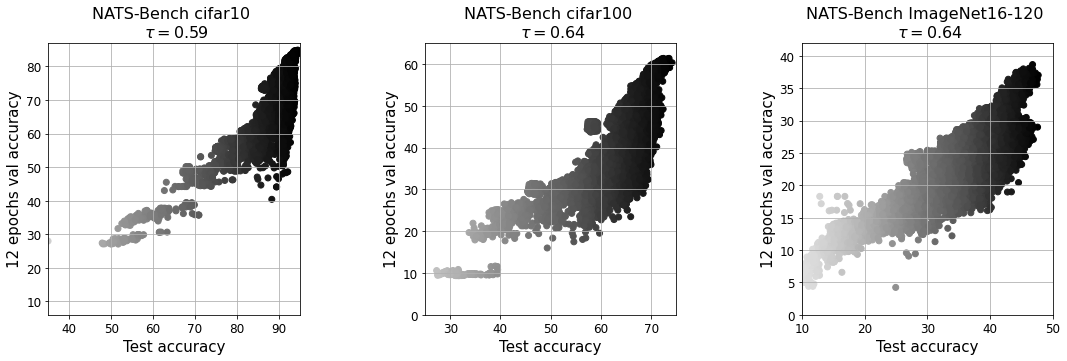

In [14]:
ylabel = "12 epochs val accuracy"
color_map = plt.get_cmap('Greys')
tau_cif10, _ = stats.kendalltau(cifar10_12ep_val['valid_accuracy_12_epochs'], cifar10_test_acc['accuracy'])
tau_cif100, _ = stats.kendalltau(cifar100_12ep_val['valid_accuracy_12_epochs'], cifar100_test_acc['accuracy'])
tau_imagenet, _ = stats.kendalltau(imagenet_12ep_val['valid_accuracy_12_epochs'], imagenet_test_acc['accuracy'])

# cifar10
fig, ax = plt.subplots(1,3, figsize=figure_size, constrained_layout=False)
ax[0].scatter(cifar10_test_acc['accuracy'], cifar10_12ep_val['valid_accuracy_12_epochs'], c=cifar10_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[0].set_xlim([35, 95])
ax[0].set_ylim([6, 87])
ax[0].set_title(f"NATS-Bench cifar10 \n $\\tau=${tau_cif10:.2f}", size=title_size)
ax[0].set_xlabel(xlabel, size=label_size)
ax[0].set_ylabel(ylabel, size=label_size)
ax[0].tick_params(axis='both', labelsize=tick_size)
ax[0].grid()

# cifar100
ax[1].scatter(cifar100_test_acc['accuracy'], cifar100_12ep_val['valid_accuracy_12_epochs'], c=cifar100_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[1].set_xlim([25, 75])
ax[1].set_ylim([0, 65])
ax[1].set_title(f"NATS-Bench cifar100 \n $\\tau=${tau_cif100:.2f}", size=title_size)
ax[1].set_xlabel(xlabel, size=label_size)
ax[1].set_ylabel(ylabel, size=label_size)
ax[1].tick_params(axis='both', labelsize=tick_size)
ax[1].grid()

# ImageNet16-120
ax[2].scatter(imagenet_test_acc['accuracy'], imagenet_12ep_val['valid_accuracy_12_epochs'], c=imagenet_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[2].set_xlim([10, 50])
ax[2].set_ylim([0, 42])
ax[2].set_title(f"NATS-Bench ImageNet16-120 \n $\\tau=${tau_imagenet:.2f}", size=title_size)
ax[2].set_xlabel(xlabel, size=label_size)
ax[2].set_ylabel(ylabel, size=label_size)
ax[2].tick_params(axis='both', labelsize=tick_size)
ax[2].grid()

plt.subplots_adjust(wspace=w_space)
plt.savefig("scatter_12ep_val_acc.svg", format='svg', dpi=600)

## ReLu scores scatter plots

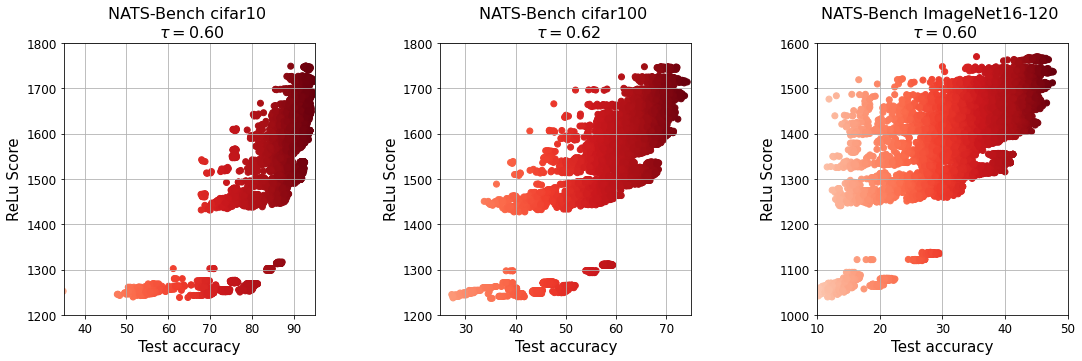

In [15]:
ylabel = "ReLu Score"
color_map = plt.get_cmap('Reds')
tau_cif10, _ = stats.kendalltau(cifar10_relu_csv['score'], cifar10_test_acc['accuracy'])
tau_cif100, _ = stats.kendalltau(cifar100_relu_csv['score'], cifar100_test_acc['accuracy'])
tau_imagenet, _ = stats.kendalltau(imagenet_relu_csv['score'], imagenet_test_acc['accuracy'])

# cifar10
fig, ax = plt.subplots(1,3, figsize=figure_size, constrained_layout=False)
ax[0].scatter(cifar10_test_acc['accuracy'], cifar10_relu_csv['score'], c=cifar10_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[0].set_xlim([35, 95])
ax[0].set_ylim([1200, 1800])
ax[0].set_title(f"NATS-Bench cifar10 \n $\\tau=${tau_cif10:.2f}", size=title_size)
ax[0].set_xlabel(xlabel, size=label_size)
ax[0].set_ylabel(ylabel, size=label_size)
ax[0].tick_params(axis='both', labelsize=tick_size)
ax[0].grid()

# cifar100
ax[1].scatter(cifar100_test_acc['accuracy'], cifar100_relu_csv['score'], c=cifar100_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[1].set_xlim([25, 75])
ax[1].set_ylim([1200, 1800])
ax[1].set_title(f"NATS-Bench cifar100 \n $\\tau=${tau_cif100:.2f}", size=title_size)
ax[1].set_xlabel(xlabel, size=label_size)
ax[1].set_ylabel(ylabel, size=label_size)
ax[1].tick_params(axis='both', labelsize=tick_size)
ax[1].grid()

# ImageNet16-120
ax[2].scatter(imagenet_test_acc['accuracy'], imagenet_relu_csv['score'], c=imagenet_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[2].set_xlim([10, 50])
ax[2].set_ylim([1000, 1600])
ax[2].set_title(f"NATS-Bench ImageNet16-120 \n $\\tau=${tau_imagenet:.2f}", size=title_size)
ax[2].set_xlabel(xlabel, size=label_size)
ax[2].set_ylabel(ylabel, size=label_size)
ax[2].tick_params(axis='both', labelsize=tick_size)
ax[2].grid()

plt.subplots_adjust(wspace=w_space)
plt.savefig("scatter_relu_score.svg", format='svg', dpi=600)

## Synflow scatter plots

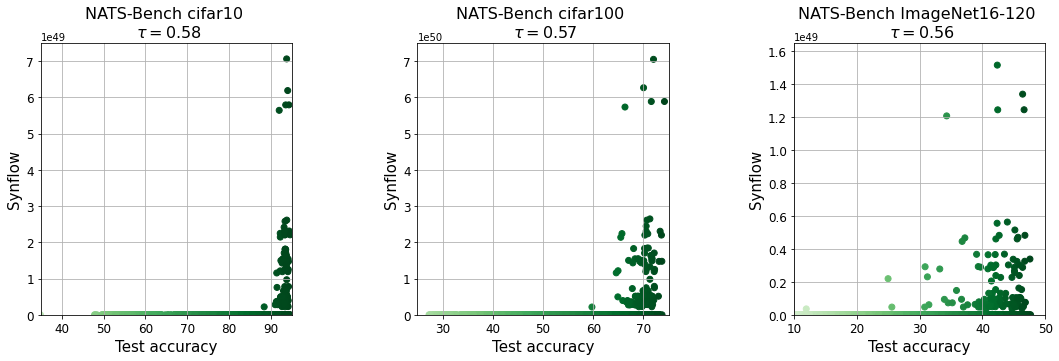

In [16]:
ylabel = "Synflow"
color_map = plt.get_cmap('Greens')
tau_cif10, _ = stats.kendalltau(cifar10_synflow_csv['synflow'], cifar10_test_acc['accuracy'])
tau_cif100, _ = stats.kendalltau(cifar100_synflow_csv['synflow'], cifar100_test_acc['accuracy'])
tau_ImNet, _ = stats.kendalltau(imagenet_synflow_csv['synflow'], imagenet_test_acc['accuracy'])

# cifar10
fig, ax = plt.subplots(1,3, figsize=figure_size, constrained_layout=False)
ax[0].scatter(cifar10_test_acc['accuracy'], cifar10_synflow_csv['synflow'], c=cifar10_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[0].set_xlim([35, 95])
ax[0].set_ylim([0.0,7.5e49])
ax[0].set_title(f"NATS-Bench cifar10 \n $\\tau=${tau_cif10:.2f}", size=title_size)
ax[0].set_xlabel(xlabel, size=label_size)
ax[0].set_ylabel(ylabel, size=label_size)
ax[0].tick_params(axis='both', labelsize=tick_size)
ax[0].grid()

# cifar100
ax[1].scatter(cifar100_test_acc['accuracy'], cifar100_synflow_csv['synflow'], c=cifar100_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[1].set_xlim([25, 75])
ax[1].set_ylim([0.0,7.5e50])
ax[1].set_title(f"NATS-Bench cifar100 \n $\\tau=${tau_cif100:.2f}", size=title_size)
ax[1].set_xlabel(xlabel, size=label_size)
ax[1].set_ylabel(ylabel, size=label_size)
ax[1].tick_params(axis='both', labelsize=tick_size)
ax[1].grid()

# ImageNet16-120
ax[2].scatter(imagenet_test_acc['accuracy'], imagenet_synflow_csv['synflow'], c=imagenet_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[2].set_xlim([10, 50])
ax[2].set_ylim([0.0,1.65e49])
ax[2].set_title(f"NATS-Bench ImageNet16-120 \n $\\tau=${tau_ImNet:.2f}", size=title_size)
ax[2].set_xlabel(xlabel, size=label_size)
ax[2].set_ylabel(ylabel, size=label_size)
ax[2].tick_params(axis='both', labelsize=tick_size)
ax[2].grid()

plt.subplots_adjust(wspace=w_space)
plt.savefig("scatter_synflow.svg", format='svg', dpi=600)

## Snip scatter plots

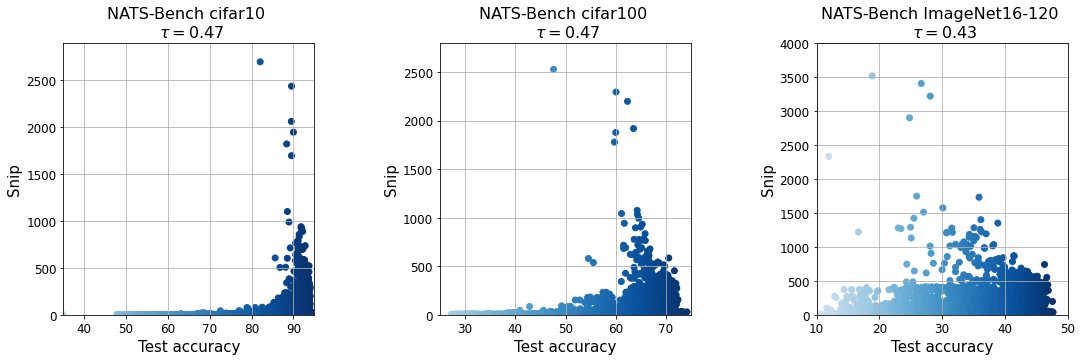

In [17]:
ylabel = "Snip"
color_map = plt.get_cmap('Blues')
tau_cif10, _ = stats.kendalltau(cifar10_snip_csv['snip'], cifar10_test_acc['accuracy'])
tau_cif100, _ = stats.kendalltau(cifar100_snip_csv['snip'], cifar100_test_acc['accuracy'])
tau_ImNet, _ = stats.kendalltau(imagenet_snip_csv['snip'], imagenet_test_acc['accuracy'])

# cifar10
fig, ax = plt.subplots(1,3, figsize=figure_size, constrained_layout=False)
ax[0].scatter(cifar10_test_acc['accuracy'], cifar10_snip_csv['snip'], c=cifar10_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[0].set_xlim([35, 95])
ax[0].set_ylim([0,2900])
ax[0].set_title(f"NATS-Bench cifar10 \n $\\tau=${tau_cif10:.2f}", size=title_size)
ax[0].set_xlabel(xlabel, size=label_size)
ax[0].set_ylabel(ylabel, size=label_size)
ax[0].tick_params(axis='both', labelsize=tick_size)
ax[0].grid()

# cifar100
ax[1].scatter(cifar100_test_acc['accuracy'], cifar100_snip_csv['snip'], c=cifar100_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[1].set_xlim([25, 75])
ax[1].set_ylim([0,2800])
ax[1].set_title(f"NATS-Bench cifar100 \n $\\tau=${tau_cif100:.2f}", size=title_size)
ax[1].set_xlabel(xlabel, size=label_size)
ax[1].set_ylabel(ylabel, size=label_size)
ax[1].tick_params(axis='both', labelsize=tick_size)
ax[1].grid()

# ImageNet16-120
ax[2].scatter(imagenet_test_acc['accuracy'], imagenet_snip_csv['snip'], c=imagenet_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[2].set_xlim([10, 50])
ax[2].set_ylim([0,4000])
ax[2].set_title(f"NATS-Bench ImageNet16-120 \n $\\tau=${tau_ImNet:.2f}", size=title_size)
ax[2].set_xlabel(xlabel, size=label_size)
ax[2].set_ylabel(ylabel, size=label_size)
ax[2].tick_params(axis='both', labelsize=tick_size)
ax[2].grid()

plt.subplots_adjust(wspace=w_space)
plt.savefig("scatter_snip.svg", format='svg', dpi=600)

## Combined score scatter plots

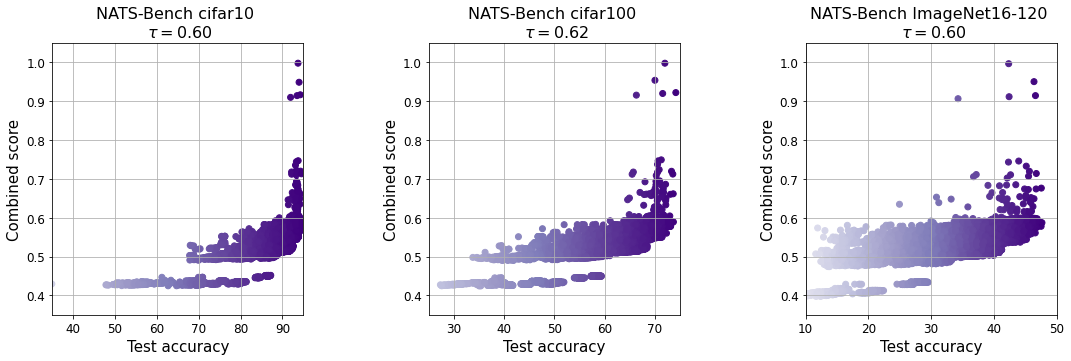

In [18]:
ylabel = "Combined score"
color_map = plt.get_cmap('Purples')
tau_cif10, _ = stats.kendalltau(cifar10_combined_csv['combined_score'], cifar10_test_acc['accuracy'])
tau_cif100, _ = stats.kendalltau(cifar100_combined_csv['combined_score'], cifar100_test_acc['accuracy'])
tau_ImNet, _ = stats.kendalltau(imagenet_combined_csv['combined_score'], imagenet_test_acc['accuracy'])

# cifar10
fig, ax = plt.subplots(1,3, figsize=figure_size, constrained_layout=False)
ax[0].scatter(cifar10_test_acc['accuracy'], cifar10_combined_csv['combined_score'], c=cifar10_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[0].set_xlim([35, 95])
ax[0].set_ylim([0.35,1.05])
ax[0].set_title(f"NATS-Bench cifar10 \n $\\tau=${tau_cif10:.2f}", size=title_size)
ax[0].set_xlabel(xlabel, size=label_size)
ax[0].set_ylabel(ylabel, size=label_size)
ax[0].tick_params(axis='both', labelsize=tick_size)
ax[0].grid()

# cifar100
ax[1].scatter(cifar100_test_acc['accuracy'], cifar100_combined_csv['combined_score'], c=cifar100_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[1].set_xlim([25, 75])
ax[1].set_ylim([0.35,1.05])
ax[1].set_title(f"NATS-Bench cifar100 \n $\\tau=${tau_cif100:.2f}", size=title_size)
ax[1].set_xlabel(xlabel, size=label_size)
ax[1].set_ylabel(ylabel, size=label_size)
ax[1].tick_params(axis='both', labelsize=tick_size)
ax[1].grid()

# ImageNet16-120
ax[2].scatter(imagenet_test_acc['accuracy'], imagenet_combined_csv['combined_score'], c=imagenet_test_acc['accuracy'], cmap=color_map, rasterized=True)
ax[2].set_xlim([10, 50])
ax[2].set_ylim([0.35,1.05])
ax[2].set_title(f"NATS-Bench ImageNet16-120 \n $\\tau=${tau_ImNet:.2f}", size=title_size)
ax[2].set_xlabel(xlabel, size=label_size)
ax[2].set_ylabel(ylabel, size=label_size)
ax[2].tick_params(axis='both', labelsize=tick_size)
ax[2].grid()

plt.subplots_adjust(wspace=w_space)
plt.savefig("scatter_combined_score.svg", format='svg', dpi=600)

# Import the numpy arrays of the test accuracy progress during the random and aging evolutionary searches

## Random search progress files

In [19]:
# cifar10 random search test accuracy progress
cifar10_rs_val12 = np.load('results/cifar10/val12/RandSearch_cifar10-val12.npy')
cifar10_rs_relu = np.load('results/cifar10/hook_logdet/RandSearch_cifar10-hook_logdet.npy')
cifar10_rs_synflow = np.load('results/cifar10/synflow/RandSearch_cifar10-synflow.npy')
cifar10_rs_snip = np.load('results/cifar10/snip/RandSearch_cifar10-snip.npy')
cifar10_rs_combined = np.load('results/cifar10/combined/RandSearch_cifar10-combined.npy')

# cifar100 random search test accuracy progress
cifar100_rs_val12 = np.load('results/cifar100/val12/RandSearch_cifar100-val12.npy')
cifar100_rs_relu = np.load('results/cifar100/hook_logdet/RandSearch_cifar100-hook_logdet.npy')
cifar100_rs_synflow = np.load('results/cifar100/synflow/RandSearch_cifar100-synflow.npy')
cifar100_rs_snip = np.load('results/cifar100/snip/RandSearch_cifar100-snip.npy')
cifar100_rs_combined = np.load('results/cifar100/combined/RandSearch_cifar100-combined.npy')

# imagenet random search test accuracy progress
imagenet_rs_val12 = np.load('results/ImageNet16-120/val12/RandSearch_ImageNet16-120-val12.npy')
imagenet_rs_relu = np.load('results/ImageNet16-120/hook_logdet/RandSearch_ImageNet16-120-hook_logdet.npy')
imagenet_rs_synflow = np.load('results/ImageNet16-120/synflow/RandSearch_ImageNet16-120-synflow.npy')
imagenet_rs_snip = np.load('results/ImageNet16-120/snip/RandSearch_ImageNet16-120-snip.npy')
imagenet_rs_combined = np.load('results/ImageNet16-120/combined/RandSearch_ImageNet16-120-combined.npy')

## Aging Evolutionary search progress files

In [20]:
# cifar10 aging evolutionary search test accuracy progress
cifar10_ae_val12 = np.load('results/cifar10/val12/AEVsearch_cifar10-val12.npy')
cifar10_ae_relu = np.load('results/cifar10/hook_logdet/AEVsearch_cifar10-hook_logdet.npy')
cifar10_ae_synflow = np.load('results/cifar10/synflow/AEVsearch_cifar10-synflow.npy')
cifar10_ae_snip = np.load('results/cifar10/snip/AEVsearch_cifar10-snip.npy')
cifar10_ae_combined = np.load('results/cifar10/combined/AEVsearch_cifar10-combined.npy')

# cifar100 aging evolutionary search test accuracy progress
cifar100_ae_val12 = np.load('results/cifar100/val12/AEVsearch_cifar100-val12.npy')
cifar100_ae_relu = np.load('results/cifar100/hook_logdet/AEVsearch_cifar100-hook_logdet.npy')
cifar100_ae_synflow = np.load('results/cifar100/synflow/AEVsearch_cifar100-synflow.npy')
cifar100_ae_snip = np.load('results/cifar100/snip/AEVsearch_cifar100-snip.npy')
cifar100_ae_combined = np.load('results/cifar100/combined/AEVsearch_cifar100-combined.npy')

# imagenet aging evolutionary search test accuracy progress
imagenet_ae_val12 = np.load('results/ImageNet16-120/val12/AEVsearch_ImageNet16-120-val12.npy')
imagenet_ae_relu = np.load('results/ImageNet16-120/hook_logdet/AEVsearch_ImageNet16-120-hook_logdet.npy')
imagenet_ae_synflow = np.load('results/ImageNet16-120/synflow/AEVsearch_ImageNet16-120-synflow.npy')
imagenet_ae_snip = np.load('results/ImageNet16-120/snip/AEVsearch_ImageNet16-120-snip.npy')
imagenet_ae_combined = np.load('results/ImageNet16-120/combined/AEVsearch_ImageNet16-120-combined.npy')

# Search algorithms test accuracy progress plots

In [21]:
# function to plot the test accuracy progess during the search
def plot_experiment(exp_list, title):
  fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True)
  def plot_exp(exp, label):
    exp = np.array(exp) 
    q_75 = np.quantile(exp, .75, axis=0)
    q_25 = np.quantile(exp, .25, axis=0)
    mean = np.mean(exp, axis=0)
    
    ax.plot(mean, label=label)
    ax.fill_between(range(len(q_25)), q_25, q_75, alpha=0.1)
  for exp,ename in exp_list:
    plot_exp(exp,ename)
  ax.set_title(title, size=16)
  ax.grid() 
  ax.set_xlabel('Visited Models', size=14)
  ax.set_ylabel('Test Accuracy', size=14)
  ax.set_xlim([0, 500])
  ax.tick_params(axis='both', labelsize=13)
  ax.legend(fontsize=13)
  plt.savefig(f"{title}.svg", format='svg')

## Random search progress plots

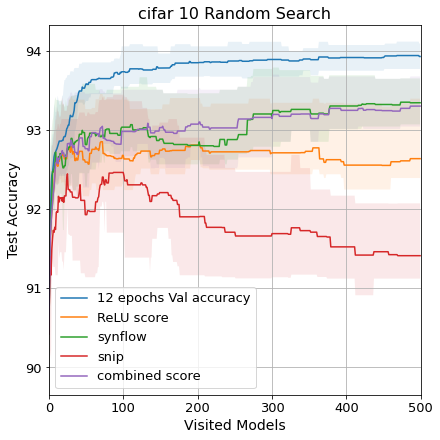

In [22]:
# test accuracy progress during random search on cifar10
plot_experiment([(cifar10_rs_val12,'12 epochs Val accuracy'), (cifar10_rs_relu, 'ReLU score'), (cifar10_rs_synflow, 'synflow'), (cifar10_rs_snip, 'snip'), (cifar10_rs_combined, 'combined score')], 'cifar 10 Random Search')

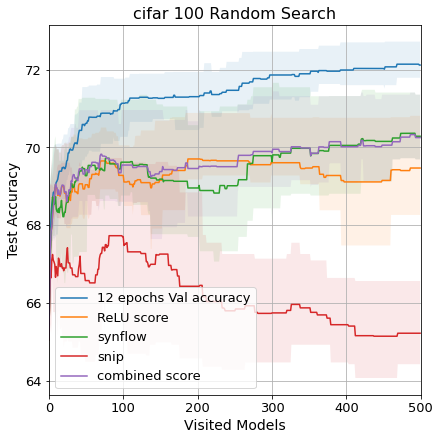

In [23]:
# test accuracy progress during random search on cifar100
plot_experiment([(cifar100_rs_val12,'12 epochs Val accuracy'), (cifar100_rs_relu, 'ReLU score'), (cifar100_rs_synflow, 'synflow'), (cifar100_rs_snip, 'snip'), (cifar100_rs_combined, 'combined score')], 'cifar 100 Random Search')

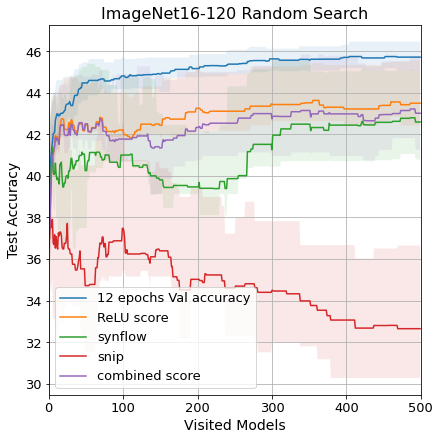

In [24]:
# test accuracy progress during random search on ImageNet16-120
plot_experiment([(imagenet_rs_val12,'12 epochs Val accuracy'), (imagenet_rs_relu, 'ReLU score'), (imagenet_rs_synflow, 'synflow'), (imagenet_rs_snip, 'snip'), (imagenet_rs_combined, 'combined score')], 'ImageNet16-120 Random Search')

## Aging Evolutionary search progress plots

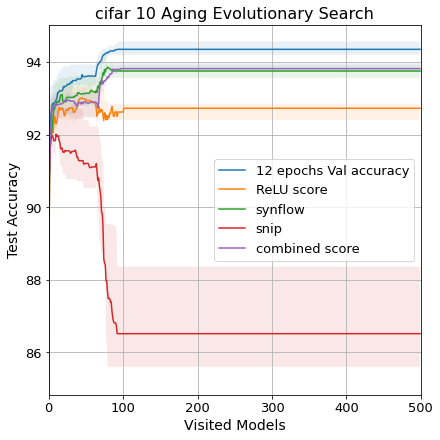

In [25]:
# test accuracy progress during aging evolutionary search on cifar100
plot_experiment([(cifar10_ae_val12,'12 epochs Val accuracy'), (cifar10_ae_relu, 'ReLU score'), (cifar10_ae_synflow, 'synflow'), (cifar10_ae_snip, 'snip'), (cifar10_ae_combined, 'combined score')], 'cifar 10 Aging Evolutionary Search')

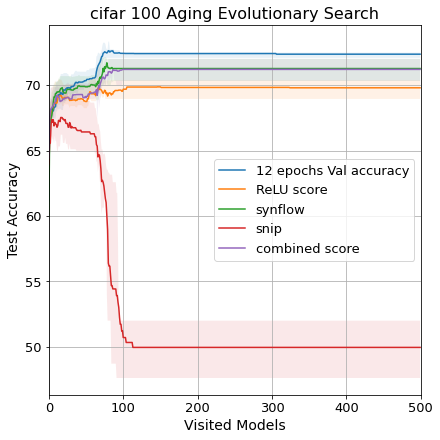

In [26]:
# test accuracy progress during aging evolutionary search on cifar10
plot_experiment([(cifar100_ae_val12,'12 epochs Val accuracy'), (cifar100_ae_relu, 'ReLU score'), (cifar100_ae_synflow, 'synflow'), (cifar100_ae_snip, 'snip'), (cifar100_ae_combined, 'combined score')], 'cifar 100 Aging Evolutionary Search')

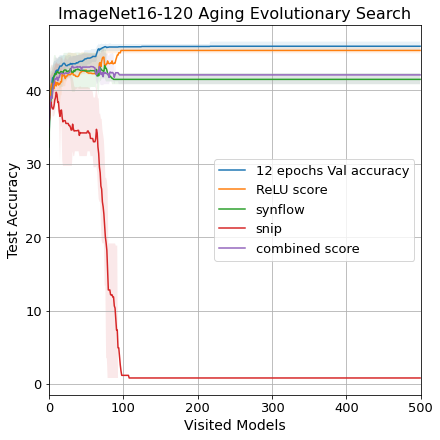

In [27]:
# test accuracy progress during aging evolutionary search on ImageNet16-120
plot_experiment([(imagenet_ae_val12,'12 epochs Val accuracy'), (imagenet_ae_relu, 'ReLU score'), (imagenet_ae_synflow, 'synflow'), (imagenet_ae_snip, 'snip'), (imagenet_ae_combined, 'combined score')], 'ImageNet16-120 Aging Evolutionary Search')